## Twitter Sentiment Analysis

## Problem Statement

#### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

<b>Understand the Problem Statement</b>

Tweets Preprocessing and Cleaning

Data Inspection

Data Cleaning

Story Generation and Visualization from Tweets

Extracting Features from Cleaned Tweets

Bag-of-Words

TF-IDF

Word Embeddings

Model Building: Sentiment Analysis

Logistic Regression

Support Vector Machine

RandomForest


XGBoost

Model Fine-tuning

Summary

## Loading Libraries and Data

In [1]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

Let's read train and test datasets.

In [2]:
train  = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
train

id  label  \
0          1      0   
1          2      0   
2          3      0   
3          4      0   
4          5      0   
...      ...    ...   
31957  31958      0   
31958  31959      0   
31959  31960      0   
31960  31961      1   
31961  31962      0   

                                                                                                                                     tweet  
0                                    @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1               @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                      bihday your majesty  
3                                                   #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                   factsguide: society now    #motivation  
...                                                                                                                                    ...  
31957                                                                 ate @user isz that youuu?ðððððððððâ¤ï¸   
31958    to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher  
31959                                                                      listening to sad songs on a monday morning otw to work is sad    
31960                                                                  @user #sikh #temple vandalised in in #calgary, #wso condemns  act    
31961                                                                                                     thank you @user for you follow    

[31962 rows x 3 columns]

## Text PreProcessing and Cleaning

#### Data Inspection
Let's check out a few non racist/sexist tweets.

In [3]:
train[train['label'] == 0].head(10)

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   
5   6      0   
6   7      0   
7   8      0   
8   9      0   
9  10      0   

                                                                                                                                             tweet  
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                           factsguide: society now    #motivation  
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦  
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦   
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !

<br>
Now check out a few racist/sexist tweets.

In [4]:
train[train['label'] == 1].head(10)

id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. again. #neverump  #xenophobia   
56                                                                                             @user lets fight against  #love #peace   
68                      ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness    
77                                             @user hey, white people: you can call people 'white' by @user  #race  #identity #medâ¦  
82                                                       how the #altright uses  &amp; insecurity to lure men into #whitesupremacy      
111  @user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦

Let's check dimensions of the train and test dataset.

In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

Train set has 31,962 tweets and test set has 17,197 tweets.

Let's have a glimpse at label-distribution in the train dataset.

In [6]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In the train dataset, we have 2,242 (~7%) tweets labeled as racist or sexist, and 29,720 (~93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

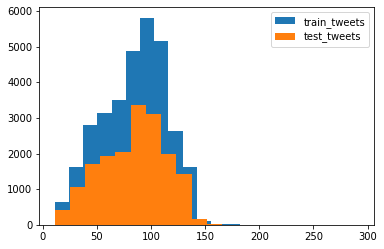

In [7]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

The tweet-length distribution is more or less the same in both train and test data.

### Data Cleaning

In [8]:
combi = train.append(test, ignore_index=True)
print(combi.shape)
combi

(49159, 3)


id  label  \
0          1    0.0   
1          2    0.0   
2          3    0.0   
3          4    0.0   
4          5    0.0   
...      ...    ...   
49154  49155    NaN   
49155  49156    NaN   
49156  49157    NaN   
49157  49158    NaN   
49158  49159    NaN   

                                                                                                                                                   tweet  
0                                                  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                             @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                                    bihday your majesty  
3                                                                 #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                                                                 factsguide: society now    #motivation  
...                                                                                                                                                  ...  
49154                                       thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics  #brexit #blm &gt;3   
49155                                                   feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid  â¦   
49156  #hillary #campaigned today in #ohio((omg)) &amp; used words like "assets&amp;liability" never once did #clinton say thee(word) #radicalization     
49157                                           happy, at work conference: right mindset leads to culture-of-development organizations    #work #mindset  
49158                                                                                   my   song "so glad" free download!  #shoegaze #newmusic #newsong  

[49159 rows x 3 columns]

Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

__1. Removing Twitter Handles (@user)__

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                                                         tidy_tweet  
0                   when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1    thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                               bihday your majesty  
3                            #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦    
4                                                                            factsguide: society now    #motivation

__2. Removing Punctuations, Numbers, and Special Characters__

In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

C:\Users\Vishal\anaconda3\envs\NLP\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   
5   6    0.0   
6   7    0.0   
7   8    0.0   
8   9    0.0   
9  10    0.0   

                                                                                                                                             tweet  \
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                                              bihday your majesty   
3                                                           #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                                           factsguide: society now    #motivation   
5                             [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo     
6                                                                        @user camping tomorrow @user @user @user @user @user @user @user dannyâ¦   
7  the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl   
8                                                          we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â¦    
9                                                                                                @user @user welcome here !  i'm   it's so #gr8 !    

                                                                                                                                        tidy_tweet  
0                                                  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    #run  
1                                   thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in ur                                        
4                                                                                                           factsguide  society now    #motivation  
5                                   huge fan fare and big talking before they leave  chaos and pay disputes when they get there  #allshowandnogo    
6                                                                                                                 camping tomorrow        danny     
7  the next school year is the year for exams      can t think about that      #school #exams   #hate #imagine #actorslife #revolutionschool #girl  
8                                                          we won    love the land    #allin #cavs #champions #cleveland #clevelandcavaliers        
9                                                                                                            welcome here    i m   it s so #gr

__3. Removing Short Words__

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Let’s take another look at the first few rows of the combined dataframe.

In [13]:
combi.head()


id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  \
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run   
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked   
2                                                                                                         bihday your majesty   
3                                      #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
4                                                                                      factsguide: society now    #motivation   

                                                                      tidy_tweet  
0             when father dysfunctional selfish drags kids into dysfunction #run  
1  thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked  
2                                                            bihday your majesty  
3                                                     #model love take with time  
4                                                 factsguide society #motivation

__4. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [14]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

In [15]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

Now we can normalize the tokenized tweets.

In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0                                                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1                                    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                                                              [bihday, your, majesti]
3                                                                                     [#model, love, take, with, time]
4                                                                                         [factsguid, societi, #motiv]
                                                             ...                                                      
49154                   [thought, factori, left, right, polaris, #trump, #uselect, #leadership, #polit, #brexit, #blm]
49155                            [feel, like, mermaid, #hairflip, #neverreadi, #formal, #wed, #gown, #dress, #mermaid]
49156    [#hillari, #campaign, today, #ohio, use

Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_tweet'] = tokenized_tweet
combi['tidy_tweet'] 

0                                             when father dysfunct selfish drag kid into dysfunct #run
1                               thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                                                  bihday your majesti
3                                                                           #model love take with time
4                                                                             factsguid societi #motiv
                                                     ...                                              
49154               thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155                       feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156    #hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157                         happi work confer right mindset lead cultur

## Story Generation and Visualization from Tweets

__A) Understanding the common words used in the tweets: WordCloud__

Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

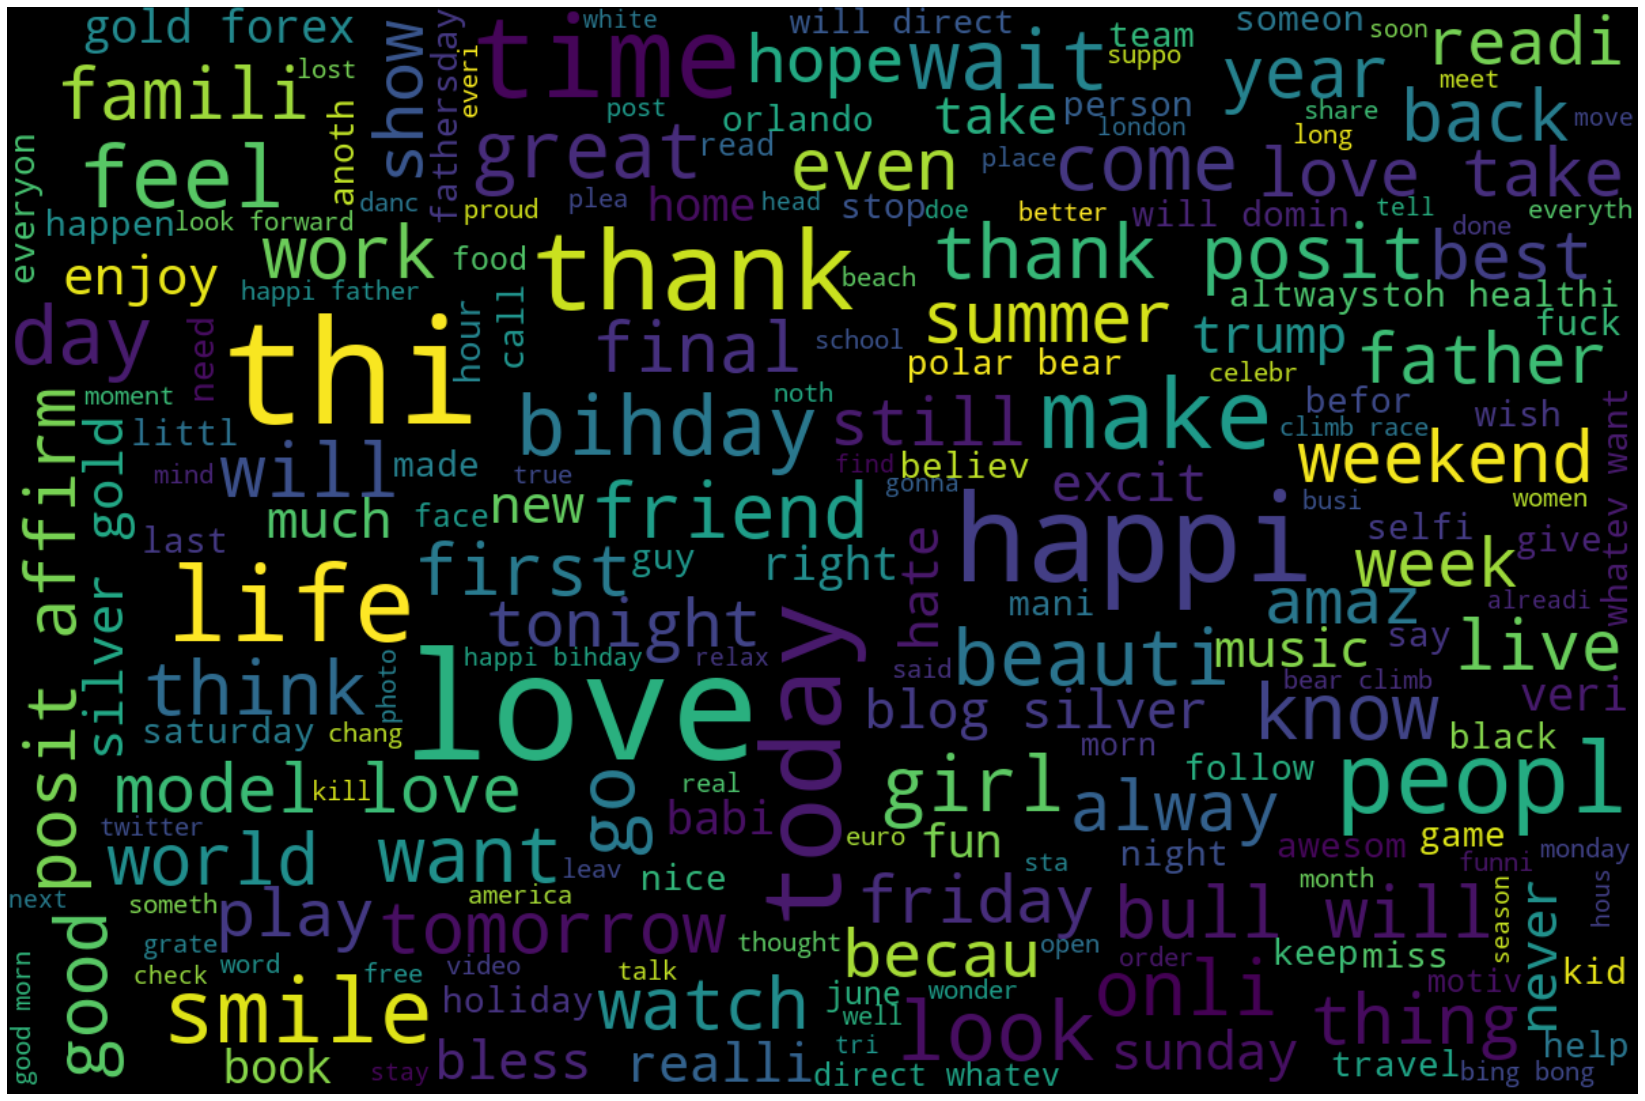

In [18]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1200, height=800, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones.

__B) Words in non racist/sexist tweets__

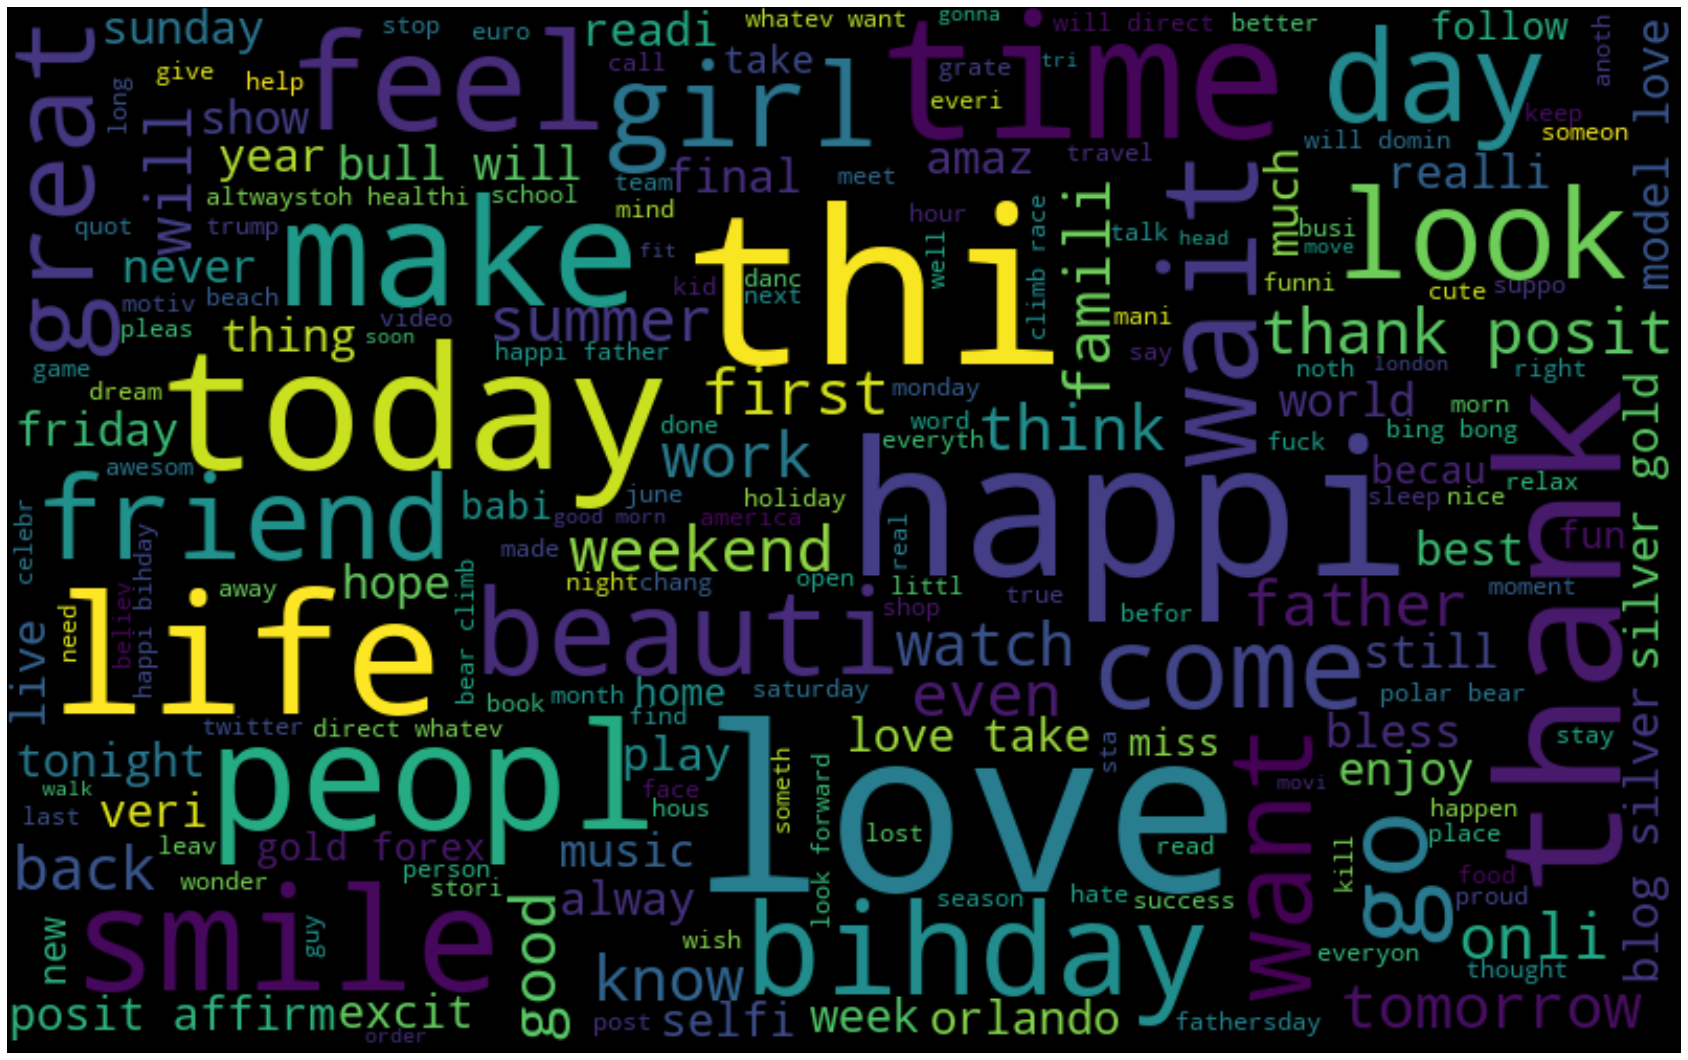

In [19]:
normal_words = ' '.join([text for text in combi['tidy_tweet'] [combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

__C) Racist/Sexist Tweets__

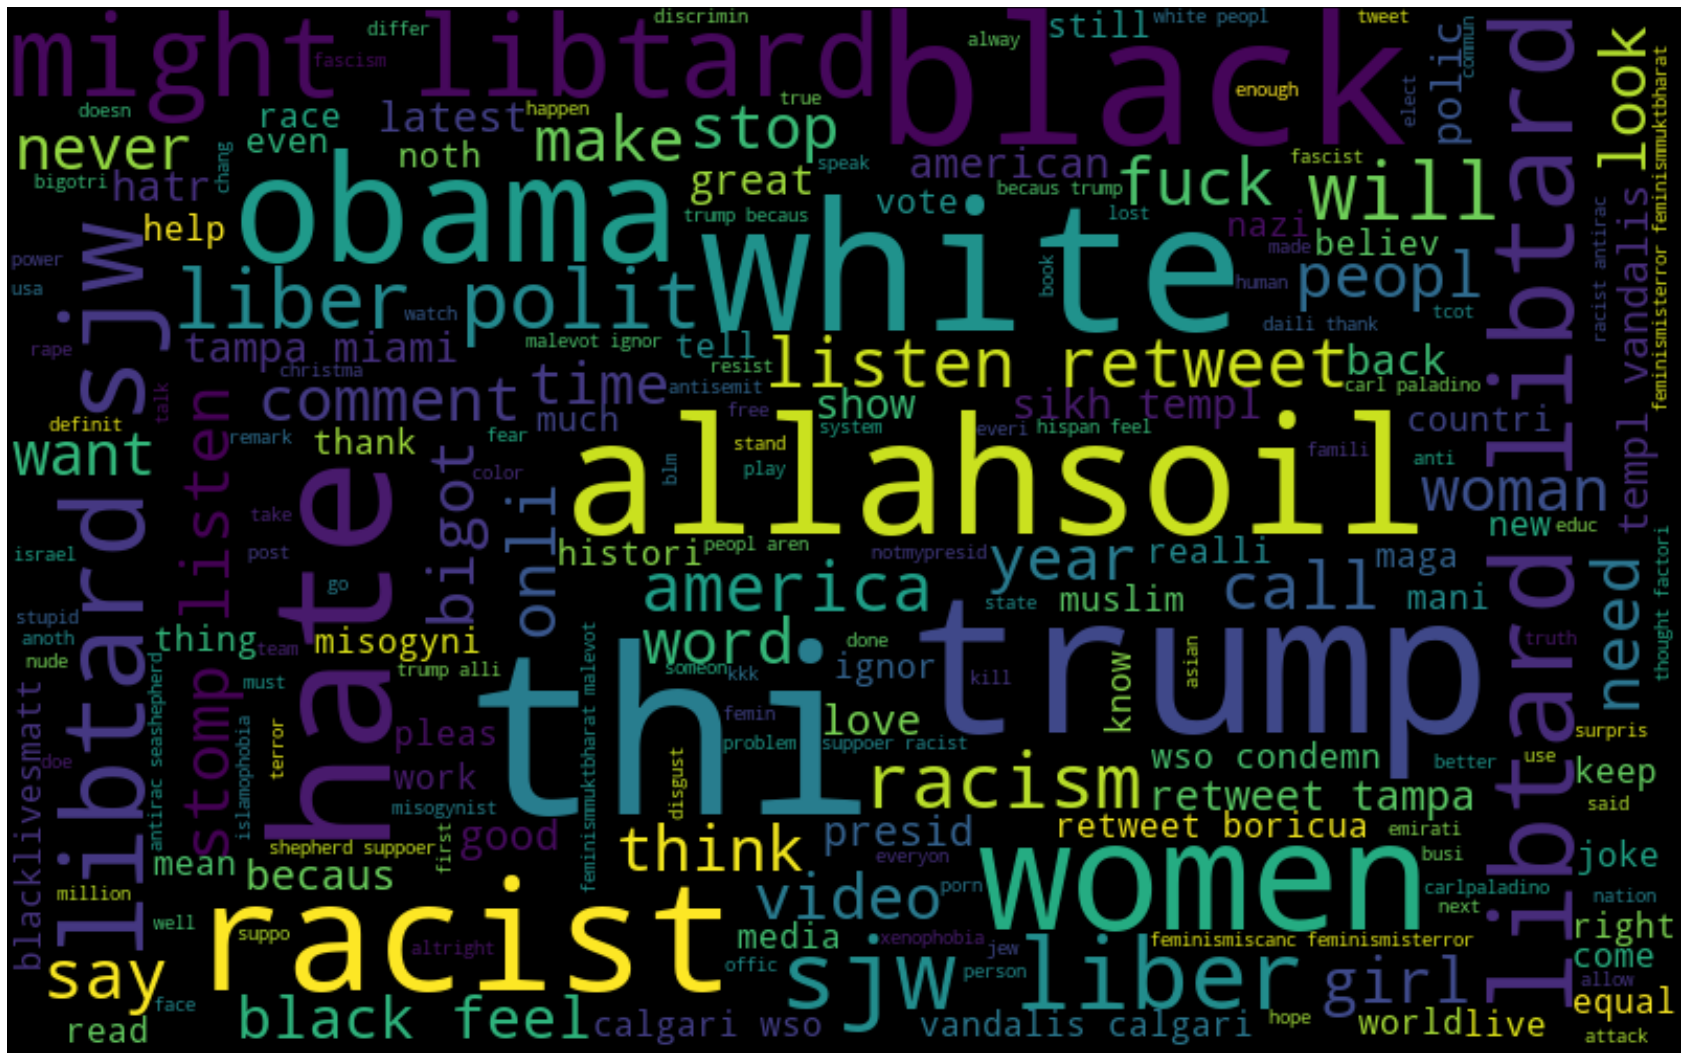

In [20]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(30,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

__D) Understanding the impact of Hashtags on tweets sentiment__

In [21]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    #loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
        
    return hashtags

In [22]:
#extracting hashtags form non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

#extracting hashtags from racist/sexist tweets

HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

#unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
print(HT_regular)
print(HT_negative)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top 'n' hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

__Non-Racist/Sexist Tweets__

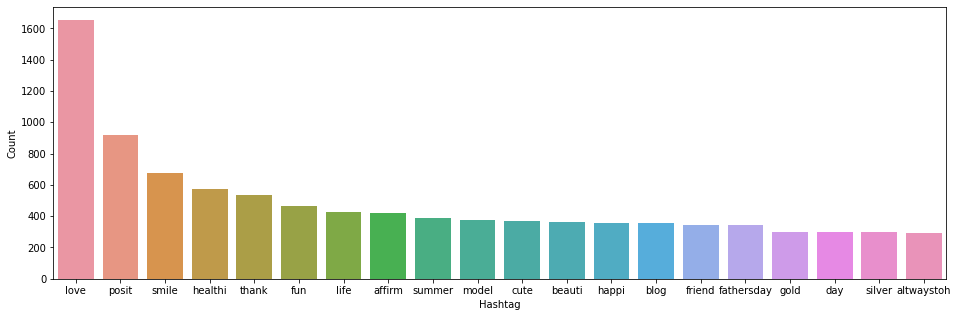

In [23]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'Count': list(a.values())})

#selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

All these hashtags are positive and it makes sense. I am expecting negative terms in the plot of the second list. Let’s check the most frequent hashtags appearing in the racist/sexist tweets.

__Racist/Sexist Tweets__

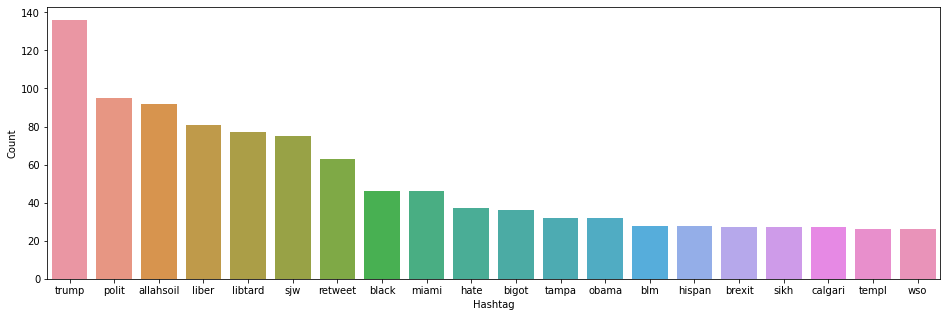

In [24]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#Selecting top 20 most frequent tweets
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Hashtag", y="Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Extracting Features from Cleaned Tweets

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
train['tweet'].head(10)

0                                              @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1                         @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2                                                                                                                                bihday your majesty
3                                                             #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                                                             factsguide: society now    #motivation
5                               [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
6                                                                          @user camping tomorrow @user @u

## Bag-of-Words Features

In [26]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
print(bow.shape)
print(bow)

# i am traveling to blr
# i am going to office 

#       i    am     traveling     to     blr    going     office 
# 1 .    1     1.     1             1.    1.      0.         0
# 2.     1.   1.      0.            1.    0.      1.         1


(49159, 1000)
  (0, 302)	1
  (0, 463)	1
  (0, 738)	1
  (1, 879)	1
  (1, 131)	1
  (1, 600)	1
  (2, 79)	1
  (3, 557)	1
  (3, 518)	1
  (3, 888)	1
  (4, 566)	1
  (5, 423)	1
  (5, 858)	1
  (5, 69)	1
  (5, 485)	1
  (6, 121)	1
  (6, 894)	1
  (7, 749)	2
  (7, 992)	2
  (7, 283)	2
  (7, 883)	1
  (7, 393)	1
  (7, 432)	1
  (7, 353)	1
  (8, 518)	1
  :	:
  (49154, 87)	1
  (49155, 498)	1
  (49155, 307)	1
  (49155, 961)	1
  (49155, 246)	1
  (49156, 891)	1
  (49156, 498)	1
  (49156, 605)	1
  (49156, 980)	2
  (49156, 929)	1
  (49156, 411)	1
  (49156, 122)	1
  (49157, 389)	1
  (49157, 981)	2
  (49157, 175)	1
  (49157, 728)	1
  (49157, 553)	2
  (49157, 480)	1
  (49157, 198)	1
  (49157, 226)	1
  (49157, 612)	1
  (49158, 333)	1
  (49158, 799)	1
  (49158, 243)	1
  (49158, 356)	1


### TF-IDF Features

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=.0, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape
print(tfidf)

# i am traveling to blr and i am going to join a comapny  -1
# i am going to office  - 2 


# TF  = number of the times key appear into a documents /total number of a key availble into a documnet 
#    = 2/13

# IDF =log (total number of document /the numbrer of document with this key )
#    = log(2/2)
#    = log(1) = 0 
    
#    TF*IDF = 0

  (0, 739)	0.6577413621857342
  (0, 464)	0.5896490179849546
  (0, 302)	0.46871135687055143
  (1, 601)	0.6835218920644196
  (1, 131)	0.6145629375807904
  (1, 879)	0.3938403468675415
  (2, 79)	1.0
  (3, 888)	0.5572995329862621
  (3, 519)	0.44016705593507854
  (3, 558)	0.7040384885805177
  (4, 567)	1.0
  (5, 486)	0.4652198168550412
  (5, 69)	0.4637175931713698
  (5, 859)	0.4743403266916206
  (5, 423)	0.586120951905663
  (6, 894)	0.5868769751051355
  (6, 121)	0.809676118019697
  (7, 353)	0.19785820398515808
  (7, 432)	0.298367397816037
  (7, 393)	0.22953868678391207
  (7, 883)	0.20713435439054187
  (7, 283)	0.6221668428341786
  (7, 992)	0.40382612331421974
  (7, 750)	0.47546741144240784
  (8, 132)	0.689689021511751
  :	:
  (49154, 729)	0.293909942896328
  (49155, 246)	0.6332778044821932
  (49155, 961)	0.532509130693973
  (49155, 307)	0.412937926376108
  (49155, 499)	0.38062516605968433
  (49156, 122)	0.3818217223390089
  (49156, 411)	0.37375293461862846
  (49156, 929)	0.30556509026170586
 

## Word Embeddings

__1. Word2Vec Embeddings__

In [28]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

# man ---- > huband , son ,male
# women  -----> wife, sister , female 


# i am feeling hungry  i am going to do (assignemnt ,dinner , sleep, walk )


# i am 
# i feeling
# i hungry
# 1 i 
# am i 
# am feling
# am hungry
# am i
# feeling i 
# feleing am 



(6510028, 7536020)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [29]:
model_w2v.wv.most_similar(positive="dinner")

[('melani', 0.6418892741203308),
 ('spaghetti', 0.6238611936569214),
 ('aladdin', 0.6073229312896729),
 ('#biall', 0.6026775240898132),
 ('#avocado', 0.5936852097511292),
 ('lunch', 0.5908828973770142),
 ('#tacotuesday', 0.5862613916397095),
 ('dess', 0.5859658122062683),
 ('cookout', 0.5851494073867798),
 ('#cellar', 0.5808728337287903)]

In [30]:
model_w2v.wv.most_similar(positive="trump")

[('#delegaterevolt', 0.6701856255531311),
 ('phoni', 0.6379677057266235),
 ('melo', 0.6173220276832581),
 ('capitalist', 0.6142439246177673),
 ('businessman', 0.6097716689109802),
 ('fraud', 0.6096423864364624),
 ('donald', 0.609115481376648),
 ('#deplor', 0.6087022423744202),
 ('tomlin', 0.6076185703277588),
 ('endors', 0.6056053042411804)]

In [36]:
model_w2v.wv['food']

array([ 0.2891075 , -0.42489654,  0.5051809 ,  0.24324326, -0.29947618,
       -0.3369058 ,  0.69787866, -0.51714736,  0.0271122 ,  0.02505947,
       -0.10777078, -0.47670528,  0.31869054, -0.5604761 ,  0.26308656,
       -0.6381055 ,  0.48754826, -1.1733469 ,  0.34541586, -0.28122598,
       -0.17762136,  0.72054124,  0.1439672 ,  0.88162136, -1.1136194 ,
       -0.13333717, -0.45198506, -0.33744845,  0.30946293, -0.48777065,
       -0.5044026 , -1.0904157 , -0.08525845,  0.4000143 , -0.46915954,
       -1.1077908 , -0.41173515,  1.0689232 ,  0.42008623,  0.824503  ,
       -0.48317978,  0.9179216 ,  0.24226387, -0.33274826,  0.24138665,
        0.00774733,  0.47330073, -1.0045481 ,  0.44356692,  0.68467134,
        0.16582018,  0.02512146,  0.55978686,  0.1539446 , -0.27596387,
        0.29395518, -0.6032584 , -0.09804611,  1.078831  ,  0.5948951 ,
       -0.63943833, -0.03570077, -0.1100795 ,  0.7136491 , -0.15113626,
       -0.36408883,  0.6202662 ,  0.8360965 ,  0.16934744, -0.40

In [37]:
len(model_w2v.wv['food']) # the length of the vector is 200

100

#### Preparing Vectors for Tweets

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [43]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1,size))
            count += 1
        except KeyError: # handling the case where the token is not in vocabulary
            
            continue
    if count != 0:
            vec /= count
    return vec

Preparing word2vec feature set.

In [46]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))
wordvec_arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 100)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape 

(49159, 100)

now we have 200 features, whereas Bag Of Words and TF-IDF we had 1000 features.

__2. Doc2Vec Embedding__

Let's load the libraries

In [50]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

To implement doc2vec, we have to __labelise__ or __tag__ each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [51]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

In [52]:
tagged_tweets = add_label(tokenized_tweet) # label all the tweets

Let's have a look at the result.

In [53]:
tagged_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

Now let's train a __doc2vec__ model.

In [57]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in tqdm(tagged_tweets)])

100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 4468258.54it/s]


In [59]:
model_d2v.train(tagged_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

__Preparing doc2vec Feature Set__

In [60]:
docvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,100))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 100)

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

1. Logistic Regression
2. Support Vector Machine
3. RandomForest
4. XGBoost

### 1. Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

__Bag-of-Words Features__

In [62]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# spliting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [63]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) #training the model

prediction = lreg.predict_proba(xvalid_bow) #predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # claculating f1 score

0.5303408146300915

Now let's make predictions for the test dataset and create a submission file.

In [64]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id', 'label']]
submission.to_csv('sub_lreg_bow.csv', index=False) #wrriting data to a csv file

Public Leaderboard F1 Score: 0.567

__TF-IDF Features__

In [65]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [66]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5473870682019487

Public Leaderboard F1 Score: 0.546

__Word2Vec Features__

In [67]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [68]:
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.6176688938381588

Public Leaderboard F1 Score: 0.612

__Doc2Vec Features__

In [69]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

In [70]:
lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.329136690647482

Public Leaderboard F1 Score: 0.381

### 2. Support Vector Machine

In [71]:
from sklearn import svm

__Bag-of-word Features__

In [72]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)

prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5088207985143919

Again let's make predictions for the test dataset and create another submission file.

In [73]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svc_bow.csv', index=False)

Public Leaderboard F1 Score: 0.554

Here both validation score and leaderboard score are slightly lesser than the Logistic Regression scores for bag-of-words features.

__TF-IDF Features__

In [74]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)

prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.5114155251141552

Public Leaderboard F1 Score: 0.511

#### Word2Vec Features

In [75]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)

prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.619674670797831

Public Leaderboard F1 Score: 0.607

__Doc2Vec Features__

In [76]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)

prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

0.23197492163009406

Public Leaderboard F1 Score: 0.154

### 3. RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier

__Bag-of-Words Features__

In [78]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)

prediction = rf.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5529225908372828

Let's make predictions for the test dataset and create another submission file.

In [79]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

Public Leaderboard F1 Score: 0.598

#### TF-IDF Features

In [80]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)

prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5571030640668524

Public Leaderboard F1 Score: 0.557

__Word2Vec Features__

In [81]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)

prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.5286624203821656

Public Leaderboard F1 Score: 0.549

__Doc2Vec Features__

In [82]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain)

prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.06506364922206506

Public Leaderboard F1 Score: 0.07

### 4. XGBoost

In [83]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

__Bag-of-Words Features__

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id', 'label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

Public Leaderboard F1 Score: 0.513

__TF-IDF Features__

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)

prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

Public Leaderboard F1 Score: 0.523

__Word2Vec Features__

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_w2v, ytrain)

In [ ]:
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

Public Leaderboard F1 Score: 0.698

XGBoost model on word2vec features has outperformed all the previuos models in this course.

__Doc2Vec Features__

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain)

In [ ]:
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

Public Leaderboard F1 Score: 0.374

## Model Finetuning

In [ ]:
import xgboost as xgb

Here we will use DMatrices. A DMatrix can contain both the features and the target.

In [ ]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [ ]:
# Parameters we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth': 6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
}

We will prepare a custom evaluation metric to calculate F1 score.

In [ ]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

__General Approach for Parameter Tuning__

We will follow the steps below to tune the parameters.

1. Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.
2. Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.
3. Tune the learning rate.
4. Finally tune gamma to avoid overfitting.

Tuning max_depth and min_child_weight

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10) 
    for min_child_weight in range(5,8)
]

In [ ]:
max_f1 = 0. # initializing with 0
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Updating __max_depth__ and __min_child_weight__ parameters.

In [ ]:
params['max_depth'] = 8
params['min_child_weight'] = 6

Tuning subsample and colsample.

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [ ]:
max_f1 = 0.
best_params = None
for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # Update our parameters
    params['colsample'] = colsample
    params['subsample'] = subsample

    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample)

print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

Updating __subsample__ and __colsample_bytree__.

In [ ]:
params['subsample'] = .9
params['colsample_bytree'] = .5

Now let's tune the learning rate.

In [ ]:
max_f1 = 0.
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))

    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

In [ ]:
params['eta'] = .1

Now lets tune __gamma__ value using the parameters already tuned above. We’ll check for 5 values here.

In [ ]:
max_f1 = 0.
best_params = None
for gamma in range(0,15):
    print("CV with gamma={}".format(gamma/10.))

    # Update ETA
    params['gamma'] = gamma/10.

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        feval= custom_eval,
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].argmax()
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma/10.

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

In [ ]:
params['gamma'] = 1.2

Let's have a look at the final list of parameters.

In [ ]:
params

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

In [ ]:
test_pred = xgb_model.predict(dtest)
test['label'] = (test_pred >= 0.3).astype(np.int)
submission = test[['id','label']]
submission.to_csv('sub_xgb_w2v_06062018.csv', index=False)

Public Leaderboard F1 Score: 0.703